# Logistic Regression

Here we attempt to classify handwritten digits using logistic regression, which assumes the following model form:

$\log \left( \frac{p}{1 - p} \right) = a_0 + a_1x_1 + a_2 x_2 + ... + a_n x_n + \epsilon$

Therefore, the log-odds of a handwritten digit being classified as e.g. '1' is given by a linear expression in each of the predictors, offset by iid error. In practice, these predictors are actual RGB values for all pixels in an image, and therefore can be astronomical. Luckily, here we have small-resolution training images, (20x20 pixels), and instead use image intensities, rather than RGB values.

The code 'Learn.py' is my attempt at object-oriented Python programming, and includes several useful features including feature-normalization and the ability to save and re-use trained parameters for later use. Here, training data is split 80-20 into training and cross-validation data sets. The model with the highest accuracy is then selected for final testing. 

The workflow is also key -- here, scripts are crafted for loading in data from disparate sources, which are then fed into the general algorithm. In the second section of this notebook, dealing with the MNIST dataset, we provide a second example of this workflow. 

Training samples are provided from Andrew Ng's Machine Learning [Coursera Exercises](https://www.coursera.org/learn/machine-learning). 

In [1]:
import Learn

/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
cd Data/ex3

/home/user1/Scripts/Python27/repos/data_science/Data/ex3


In [3]:
#Importing necessary package as well as loading script
import ex3_load as ex3
import numpy as np
import matplotlib.pyplot as plt
import re
from subprocess import call
import os
import pandas as pd
import matplotlib.image as img
from PIL import Image
import numba

/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
#Main Script body for EX3 Data Loading
x = ex3.ex3_load("ex3_imagedata.csv")
y = ex3.ex3_load("ex3_labels.csv")

x = np.hstack([np.ones(x.shape[0])[:, np.newaxis], x])

In [5]:
#Instantiating a Logistic Regression type object
data = Learn.LogReg(x, y, 2.5, 0.01)

Running binary logistic regression for the following category: 1.0


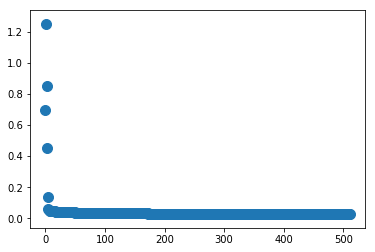

Running binary logistic regression for the following category: 2.0


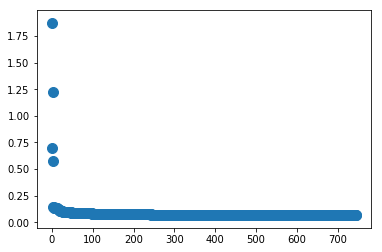

Running binary logistic regression for the following category: 3.0


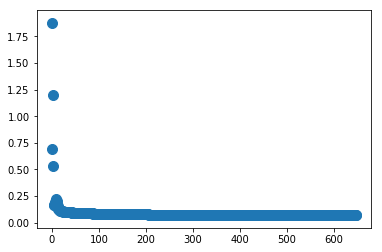

Running binary logistic regression for the following category: 4.0


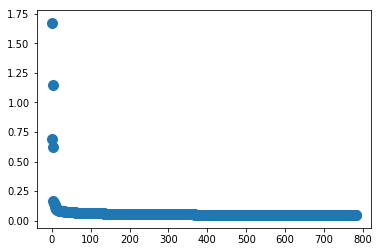

Running binary logistic regression for the following category: 5.0


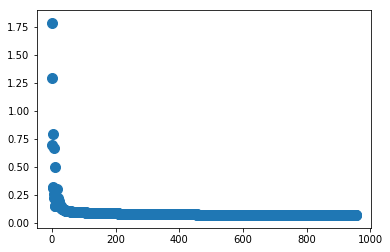

Running binary logistic regression for the following category: 6.0


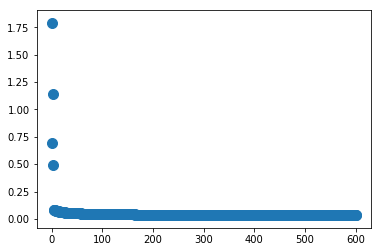

Running binary logistic regression for the following category: 7.0


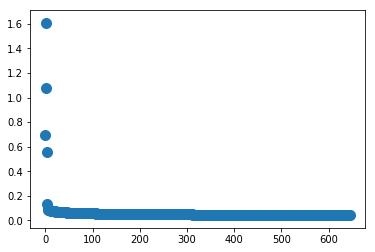

Running binary logistic regression for the following category: 8.0


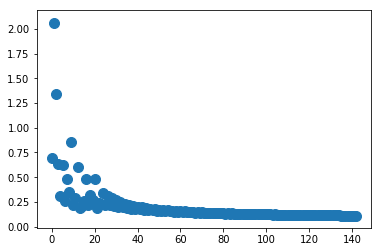

Running binary logistic regression for the following category: 9.0


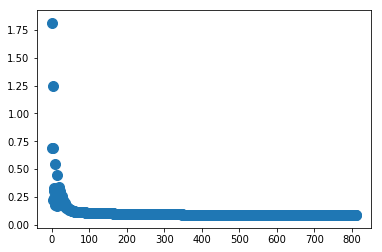

Running binary logistic regression for the following category: 10.0


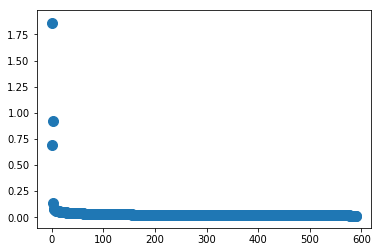

In [6]:
#Running cross-validation on a held-out dataset (20% of training)
_, test_acc, _ = data.CrossVal(0.80, 0.00001, 1.0)

In [7]:
test_acc

0.886

## LR on MNIST dataset

Here we perform a similar analysis to the above, except on the much larger MNIST dataset of handwritten digits. Datasets as well as codes for loading (and instructions) are available from the source in this [link](http://yann.lecun.com/exdb/mnist/)

In [11]:
cd ../..

/home/user1/Scripts/Python27/repos/data_science


In [12]:
#Loading script
from mnist import MNIST

mnist = MNIST("./Data/python-mnist/")

train_img, train_labels = mnist.load_training()
test_img, test_labels = mnist.load_testing()

train_img, train_labels = np.array(train_img), np.array(train_labels)
test_img, test_labels = np.array(test_img), np.array(test_labels)

x, y = np.array(train_img), np.array(train_labels)

Running binary logistic regression for the following category: 0


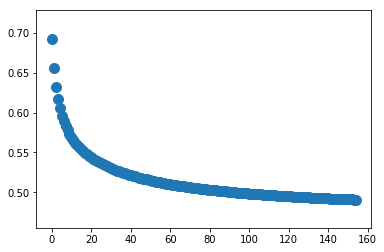

Running binary logistic regression for the following category: 1


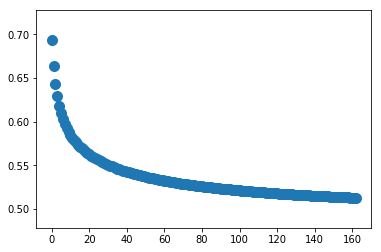

Running binary logistic regression for the following category: 2


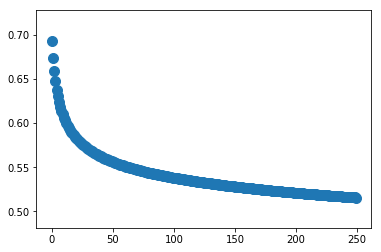

Running binary logistic regression for the following category: 3


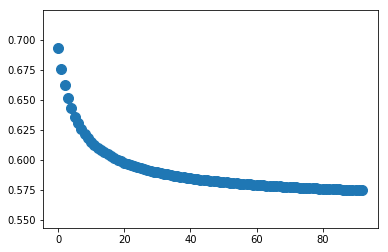

Running binary logistic regression for the following category: 4


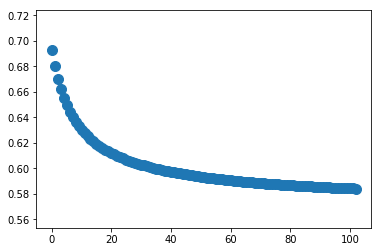

Running binary logistic regression for the following category: 5


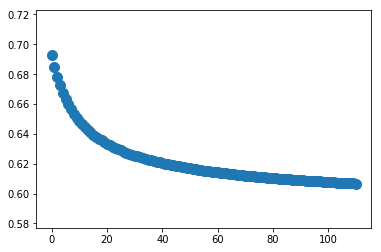

Running binary logistic regression for the following category: 6


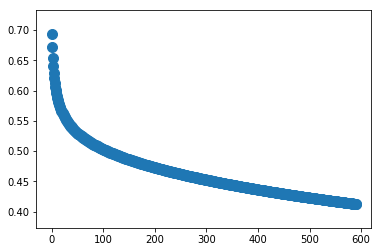

Running binary logistic regression for the following category: 7


/home/user1/Scripts/Python27/repos/data_science/Learn.py:52: RuntimeWarning: invalid value encountered in multiply
  return (1/self.numobs)*np.sum(-self.y*np.log(h) - (1 - self.y)*np.log(1 - h)) + self.Lambda*(0.5/self.numobs)*np.sum(param[1:]**2)


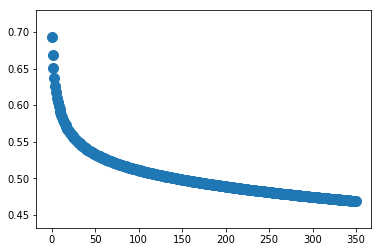

Running binary logistic regression for the following category: 8


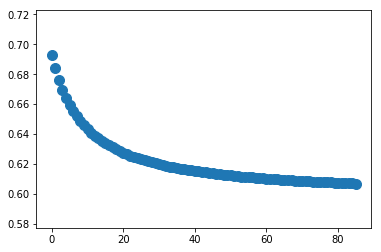

Running binary logistic regression for the following category: 9


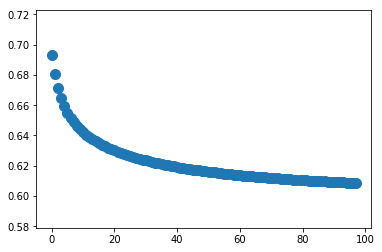

In [13]:
#Instantiating a Logistic Regression type object
data = Learn.LogReg(x, y, 2.5, 0.01)

#Feature normalization and scaling (for numerical stability)
data.normalize(0.1)

#Running cross validation on a held-out CV dataset of 20% the size of the training dataset
_, test_acc, _ = data.CrossVal(0.80, 0.0001, 1.0)

In [14]:
test_acc

0.82625

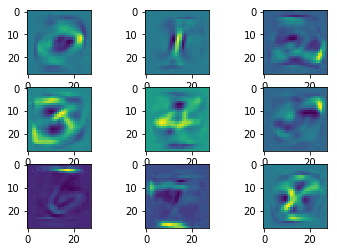

In [15]:
#Visualizing calculated LR parameters as images in original data dimensions
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(data.theta[0].reshape(28, 28))
axarr[0,1].imshow(data.theta[1].reshape(28, 28))
axarr[0,2].imshow(data.theta[2].reshape(28, 28))
axarr[1,0].imshow(data.theta[3].reshape(28, 28))
axarr[1,1].imshow(data.theta[4].reshape(28, 28))
axarr[1,2].imshow(data.theta[5].reshape(28, 28))
axarr[2,0].imshow(data.theta[6].reshape(28, 28))
axarr[2,1].imshow(data.theta[7].reshape(28, 28))
axarr[2,2].imshow(data.theta[8].reshape(28, 28))
plt.show()